# Heart failure clinical records. This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
%matplotlib inline
# file_path = ['heart_failure_clinical_records_dataset.csv']

# column_names = {}
# for file_path in file_paths:
#     with open(file_path, 'r') as f:
#         first_line = f.readline().strip()
#         names = first_line.lstrip('# ').split(' ')
#         names = [name for name in names if name and not name.isnumeric()]
#         column_names[file_path] = names
        
# dfs = {}
# for file_path in file_paths:
#     dfs[file_path] = pd.read_csv(file_path, comment='#', delimiter = r'\s+', names=column_names[file_path])

# df = pd.DataFrame()
# for file_path, data in dfs.items():
#     df = pd.concat([df, data])

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

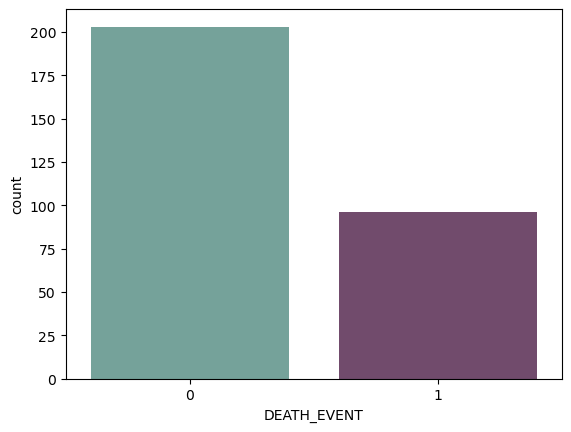

In [4]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
import seaborn as sns
cols= ["#6daa9f","#774571"]
sns.countplot(x= df["DEATH_EVENT"], palette= cols)

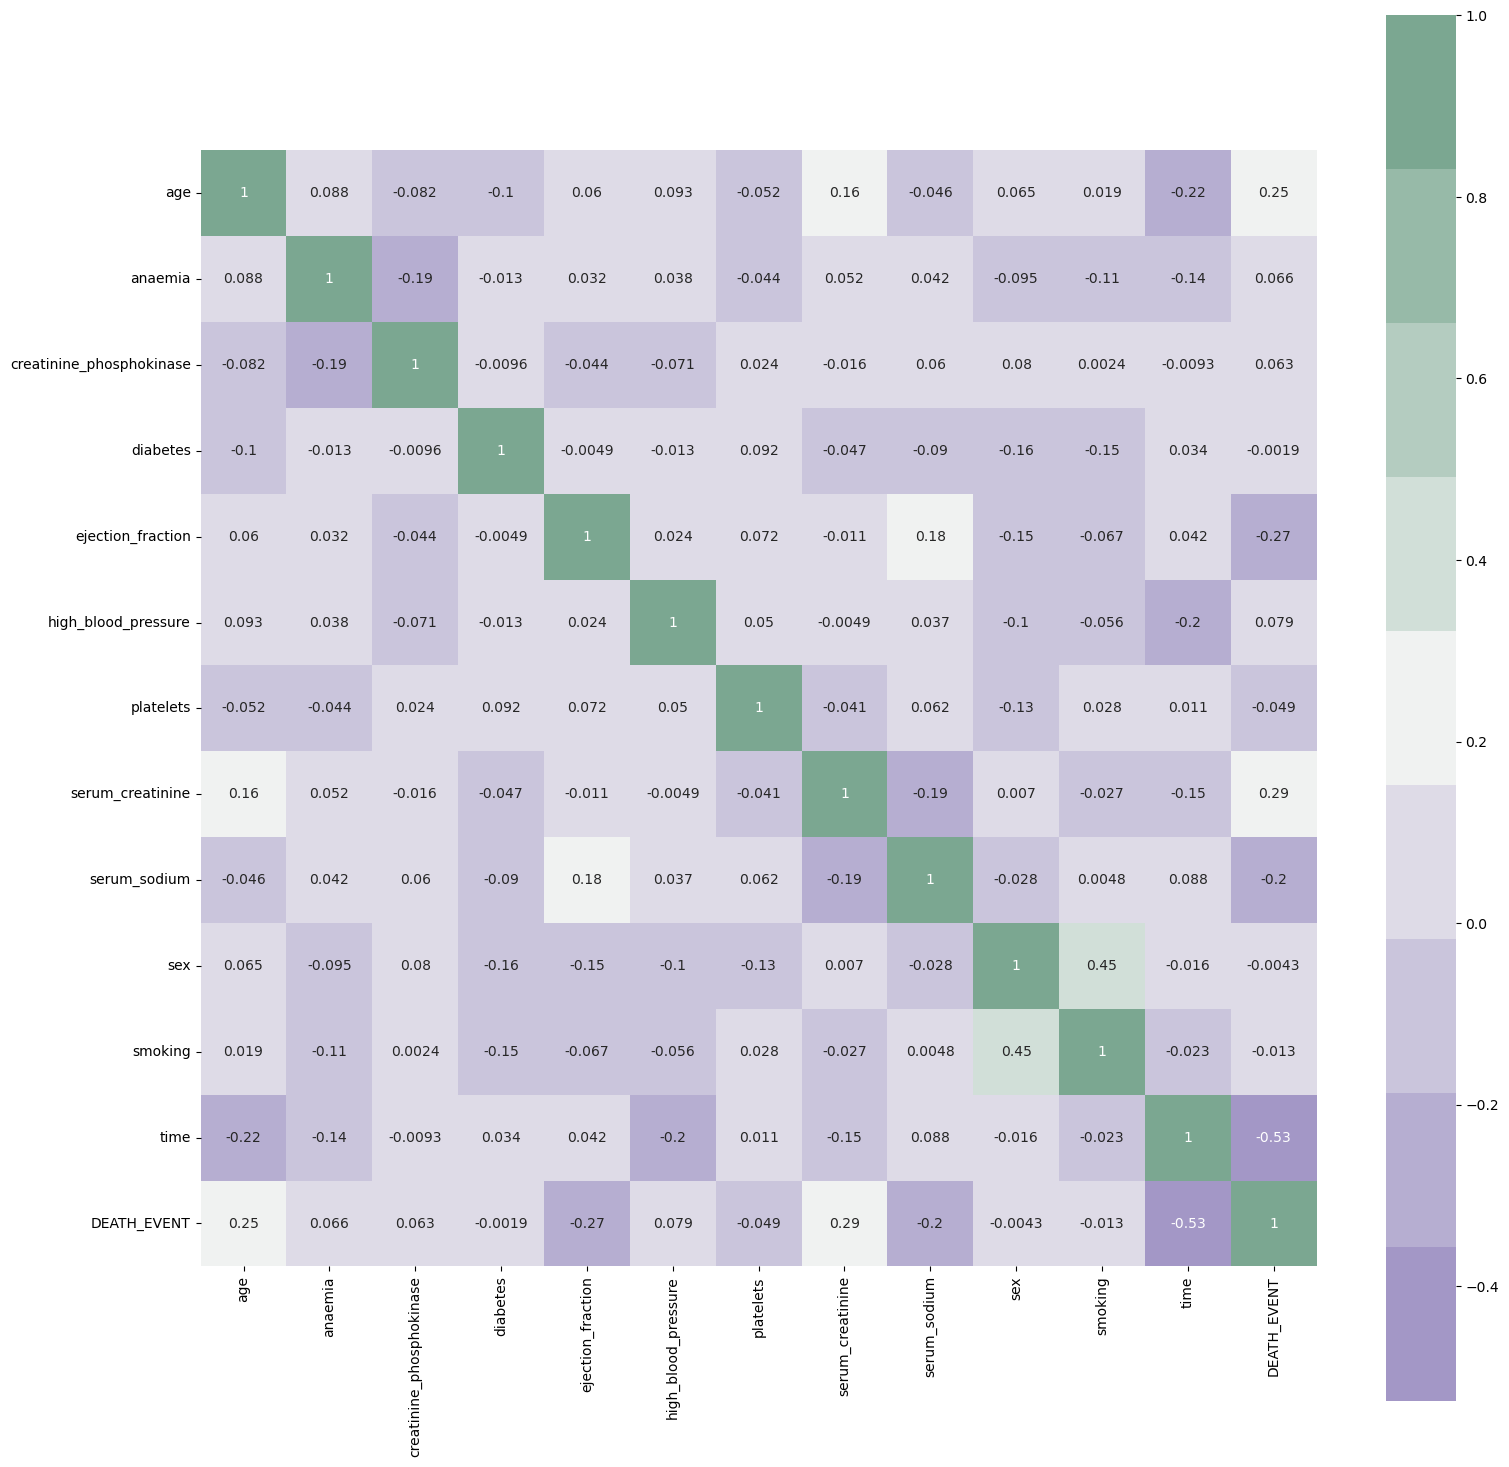

In [5]:
# df["sex"].value_counts()
#Examaning a corelation matrix of all the features 
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
#assigning values to features as X and target as y
X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]

In [8]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [9]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

In [10]:
# basic method
clf = SVC() 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8933
SVC f1-score  : 0.7500
SVC precision : 0.6667
SVC recall    : 0.8571

               precision    recall  f1-score   support

           0       0.96      0.90      0.93        61
           1       0.67      0.86      0.75        14

    accuracy                           0.89        75
   macro avg       0.82      0.88      0.84        75
weighted avg       0.91      0.89      0.90        75



In [11]:
# basic method
clf = SVC(kernel='linear') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8133
SVC f1-score  : 0.6111
SVC precision : 0.6111
SVC recall    : 0.6111

               precision    recall  f1-score   support

           0       0.88      0.88      0.88        57
           1       0.61      0.61      0.61        18

    accuracy                           0.81        75
   macro avg       0.74      0.74      0.74        75
weighted avg       0.81      0.81      0.81        75



In [12]:
# basic method
clf1 = SVC(kernel='rbf') 
clf1.fit(X_train, y_train) 

y_pred = clf1.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8933
SVC f1-score  : 0.7500
SVC precision : 0.6667
SVC recall    : 0.8571

               precision    recall  f1-score   support

           0       0.96      0.90      0.93        61
           1       0.67      0.86      0.75        14

    accuracy                           0.89        75
   macro avg       0.82      0.88      0.84        75
weighted avg       0.91      0.89      0.90        75



In [13]:
# basic method
clf = SVC(kernel='poly') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8533
SVC f1-score  : 0.5600
SVC precision : 0.3889
SVC recall    : 1.0000

               precision    recall  f1-score   support

           0       1.00      0.84      0.91        68
           1       0.39      1.00      0.56         7

    accuracy                           0.85        75
   macro avg       0.69      0.92      0.74        75
weighted avg       0.94      0.85      0.88        75



In [14]:
# basic method
clf = SVC(kernel='sigmoid') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8533
SVC f1-score  : 0.7027
SVC precision : 0.7222
SVC recall    : 0.6842

               precision    recall  f1-score   support

           0       0.89      0.91      0.90        56
           1       0.72      0.68      0.70        19

    accuracy                           0.85        75
   macro avg       0.81      0.80      0.80        75
weighted avg       0.85      0.85      0.85        75



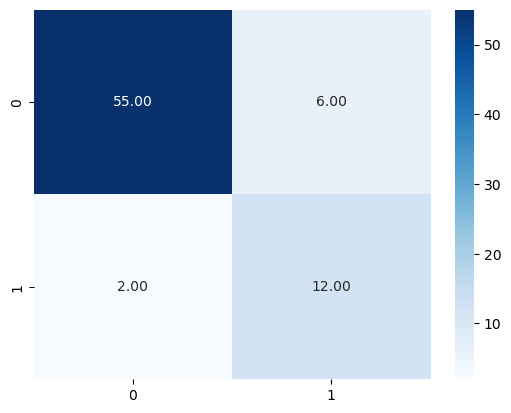

In [20]:
y_pred = clf1.predict(X_test)

cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(cf_matrix, annot = True, fmt=".2f", cmap="Blues")
plt.show()

In [23]:
# import numpy as np
# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]
# train_set, test_set = split_train_test(df, 0.2)
# print(len(train_set), "train +", len(test_set), "test")
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Feature"] = X_df.columns
vif["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
print(vif)


                     Feature       VIF
0                        age  1.106067
1                    anaemia  1.087163
2   creatinine_phosphokinase  1.066014
3                   diabetes  1.064324
4          ejection_fraction  1.067758
5        high_blood_pressure  1.068377
6                  platelets  1.045809
7           serum_creatinine  1.081241
8               serum_sodium  1.101927
9                        sex  1.337716
10                   smoking  1.285049
11                      time  1.138009


In [17]:
# humidity_correlations = df.corr()[["DEATH_EVENT"]].sort_values(by='DEATH_EVENT', key=abs, ascending=False)

# plt.figure(figsize=(10,15))
# sns.heatmap(humidity_correlations, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5, linecolor='black')
# plt.title('Correlation Death of DEATH_EVENT with Other Features')
# plt.show()

In [18]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# X = df.drop(['DEATH_EVENT', 'time'], axis=1)
# y = df['DEATH_EVENT']

# lr_model = LinearRegression()

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# cv_r2_scores = cross_val_score(lr_model, X, y, cv=kf, scoring='r2')
# cv_mae_scores = -cross_val_score(lr_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
# cv_mse_scores = -cross_val_score(lr_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# mean_r2 = np.mean(cv_r2_scores)
# mean_mae = np.mean(cv_mae_scores)
# mean_mse = np.mean(cv_mse_scores)
# mean_rmse = np.sqrt(mean_mse)

# std_r2 = np.std(cv_r2_scores)
# std_mae = np.std(cv_mae_scores)
# std_mse = np.std(cv_mse_scores)
# std_rmse = np.sqrt(std_mse)

# print('means are: ', mean_r2, mean_mae, mean_mse, mean_rmse)

# print('standard deviations are: ', std_r2, std_mae, std_mse, std_rmse)

In [19]:
# df.hist(bins=50, figsize=(20,15))
# plt.show()